In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re
from nltk.corpus import stopwords

In [2]:
# Load Dataset and combined them to get insights
train_df = pd.read_csv('data/TRAIN/labeled_10K.csv')
test_df = pd.read_csv('data/TEST/labeled_17k.csv')

# The following line combines both the datasets just to get details about them
data = [train_df, test_df]

In [3]:
for df in data:
    print(df.shape)
    display(df.head())

(10560, 12)


,hmid,moment,concepts,agency,social,age,country,gender,married,parenthood,reflection,duration
0,27674,I was happy when my son got 90% marks in his e...,education|family,no,yes,29.0,IND,m,married,y,24h,half_a_day
1,27685,went to movies with my friends it was fun,entertainment,yes,yes,29.0,IND,m,single,y,24h,half_a_day
2,27691,A hot kiss with my girl friend last night made...,romance,yes,yes,25.0,IND,m,married,y,24h,at_least_one_hour
3,27701,My son woke me up to a fantastic breakfast of ...,family|food,no,yes,79,USA,f,widowed,y,24h,all_day_im_still_feeling_it
4,27712,My older daughter keeps patting my younger dau...,family,no,yes,30,USA,f,married,y,24h,a_few_moment


(17215, 12)


,hmid,moment,reflection,age,country,gender,duration,married,parenthood,concepts,agency,social
0,0,I was able to spend the day with my fiance sho...,24h,28,USA,m,all_day_im_still_feeling_it,single,n,shopping|family|romance,yes,no
1,1,I was able to play with my cat.,24h,28,USA,m,at_least_one_hour,single,n,animals,yes,no
2,2,I was able to clean my room and gold my laundry.,24h,28,USA,m,at_least_one_hour,single,n,0,yes,no
3,3,I spend the day at a party on the beach and I ...,24h,24,USA,m,half_a_day,single,n,vacation|party|weather,yes,yes
4,4,My cat greeting me when I got home from work -...,24h,24,USA,m,half_a_day,single,n,animals,no,no


### Value counts before checking for duplicates on the 'moment' column of the TRAIN dataset

yes    5625
no     4935
Name: social, dtype: int64


<AxesSubplot:xlabel='social', ylabel='count'>

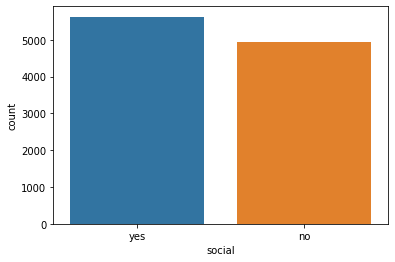

In [4]:
print(train_df['social'].value_counts())
sns.countplot(x=train_df['social'])

yes    7796
no     2764
Name: agency, dtype: int64


<AxesSubplot:xlabel='agency', ylabel='count'>

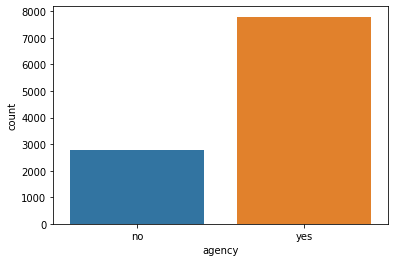

In [5]:
print(train_df['agency'].value_counts())
sns.countplot(x=train_df['agency'])

### Checking for duplicates in the train dataset

We check for ducplicates in the moment column, as we would be needing this column to train our models
The whole row here is not duplicate, but the values in the 'moment' column is, hence we need to eliminate them because we are not using any other feature to train the model but 'moment'

In [6]:
print(f'Shape of the Train Dataset before removing duplicates : {train_df.shape}')
duplicate = train_df[train_df.duplicated('moment')]
print(f'Duplicates found in the moment column : {duplicate.shape}')

Shape of the Train Dataset before removing duplicates : (10560, 12)
Duplicates found in the moment column : (639, 12)


Removing the duplicates from the 'moment' column

In [7]:
train_df.drop_duplicates(subset ="moment", inplace = True)
print(f'Shape of the Train Dataset after removing duplicates : {train_df.shape}')

Shape of the Train Dataset after removing duplicates : (9921, 12)


### Value counts for both the datasets after removing duplicates from the Train Dataset

#### social labels for the train dataset

yes    5413
no     4508
Name: social, dtype: int64


<AxesSubplot:xlabel='social', ylabel='count'>

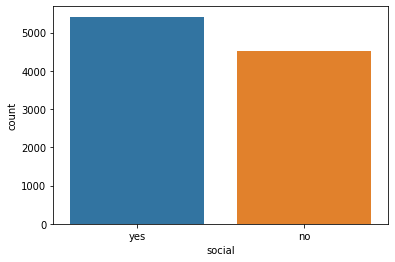

In [8]:
print(train_df['social'].value_counts())
sns.countplot(x=train_df['social'])

#### agency labels for the train dataset

yes    7221
no     2700
Name: agency, dtype: int64


<AxesSubplot:xlabel='agency', ylabel='count'>

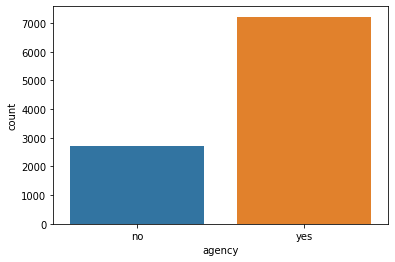

In [9]:
print(train_df['agency'].value_counts())
sns.countplot(x=train_df['agency'])

#### social labels for the test dataset

yes    9798
no     7417
Name: social, dtype: int64


<AxesSubplot:xlabel='social', ylabel='count'>

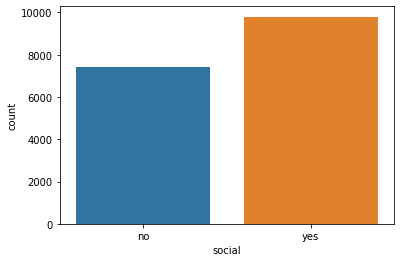

In [10]:
print(test_df['social'].value_counts())
sns.countplot(x=test_df['social'])

#### agency labels for the test dataset

yes    12156
no      5059
Name: agency, dtype: int64


<AxesSubplot:xlabel='agency', ylabel='count'>

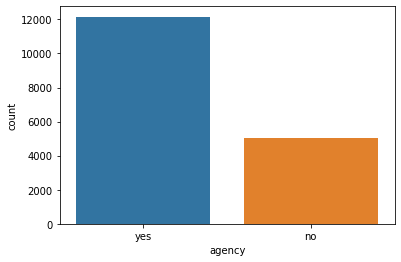

In [11]:
print(test_df['agency'].value_counts())
sns.countplot(x=test_df['agency'])

### Concatinating both the datasets to perform Text-Processing [they will be filtered back to their original form]

In [12]:
train_df_len = len(train_df)
print(f'{train_df_len}, this length will be used to break both the datasets again')
df = pd.concat([train_df,test_df])
display(df.head())
display(df.tail())

9921, this length will be used to break both the datasets again


,hmid,moment,concepts,agency,social,age,country,gender,married,parenthood,reflection,duration
0,27674,I was happy when my son got 90% marks in his e...,education|family,no,yes,29.0,IND,m,married,y,24h,half_a_day
1,27685,went to movies with my friends it was fun,entertainment,yes,yes,29.0,IND,m,single,y,24h,half_a_day
2,27691,A hot kiss with my girl friend last night made...,romance,yes,yes,25.0,IND,m,married,y,24h,at_least_one_hour
3,27701,My son woke me up to a fantastic breakfast of ...,family|food,no,yes,79,USA,f,widowed,y,24h,all_day_im_still_feeling_it
4,27712,My older daughter keeps patting my younger dau...,family,no,yes,30,USA,f,married,y,24h,a_few_moment


,hmid,moment,concepts,agency,social,age,country,gender,married,parenthood,reflection,duration
17210,21892,My wife and I went for a hike last week and we...,romance|exercise|family,yes,yes,34,USA,m,married,n,3m,half_a_day
17211,21893,I finally hit platinum rank in Overwatch.,entertainment,yes,no,34,USA,m,married,n,3m,at_least_one_hour
17212,21897,One of my long-time friends and I finally ackn...,romance,yes,yes,34,USA,m,single,n,3m,all_day_im_still_feeling_it
17213,21898,I earned a professional certification.,career|education,yes,no,34,USA,m,single,n,3m,half_a_day
17214,21899,I built a new computer.,technology,yes,no,34,USA,m,single,n,3m,half_a_day


### Converting the 'social' and 'agency' columns to binary values

In [13]:
df['social'] = df['social'].replace({'yes':1,'no':0})
df['agency'] = df['agency'].replace({'yes':1,'no':0})

print(df['social'].value_counts())
print(df['agency'].value_counts())

1    15211
0    11925
Name: social, dtype: int64
1    19377
0     7759
Name: agency, dtype: int64


### Columns Selection 'hmid','moment','social','agency'

In [14]:
df = df[['hmid','moment','social','agency']]
df.head()

,hmid,moment,social,agency
0,27674,I was happy when my son got 90% marks in his e...,1,0
1,27685,went to movies with my friends it was fun,1,1
2,27691,A hot kiss with my girl friend last night made...,1,1
3,27701,My son woke me up to a fantastic breakfast of ...,1,0
4,27712,My older daughter keeps patting my younger dau...,1,0


## Text Pre-Processing

During the Text Pre-processing, we did not include "PRONOUNS" in the list of stop words. This is because pronous in particular can contribute to identify agency and social labels. ("I, we, us ....")

In [15]:
# Pre processing the moment text
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext

def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned

def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

def removeStopWords(sentence):
    stop_words = stopwords.words('english')
    # The reason for excluding these pronouns is discussed in the later section
    pronouns = ['mine','ours','our','it','my','i', 'you', 'he', 'they', 'we', 'she', 'who', 'them', 'me', 'him', 'one', 'her', 'us','himself','someone', 'themselves', 'everyone', 'itself', 'anyone', 'myself','hers','his','thiers','their','myself','yourself','ourselves','all','anybody']
    for word in pronouns:
        if word in stop_words:
            stop_words.remove(word)
    
    sent = ""
    for val in sentence.split():
        if val not in stop_words:
            sent += (val+" ")
    return sent

In [16]:
df['moment'] = df['moment'].str.lower()
df['moment'] = df['moment'].apply(cleanHtml)
df['moment'] = df['moment'].apply(cleanPunc)
df['moment'] = df['moment'].apply(keepAlpha)
df['moment'] = df['moment'].apply(removeStopWords)

df.head() 

,hmid,moment,social,agency
0,27674,i happy my son got marks his examination,1,0
1,27685,went movies my friends it fun,1,1
2,27691,hot kiss my girl friend last night made my day,1,1
3,27701,my son woke me fantastic breakfast eggs his sp...,1,0
4,27712,my older daughter keeps patting my younger dau...,1,0


#### Breaking the datasets now as the text pre-processing is done

In [17]:
train_df = df[:train_df_len]
print(train_df.shape)
display(train_df.head())
display(train_df.tail())

(9921, 4)


,hmid,moment,social,agency
0,27674,i happy my son got marks his examination,1,0
1,27685,went movies my friends it fun,1,1
2,27691,hot kiss my girl friend last night made my day,1,1
3,27701,my son woke me fantastic breakfast eggs his sp...,1,0
4,27712,my older daughter keeps patting my younger dau...,1,0


,hmid,moment,social,agency
10555,128748,my husband called me tell me he loved me,1,0
10556,128753,i worked always makes me feel good,0,1
10557,128754,finally got watch new resident evil movie,0,1
10558,128757,i got talk old friend reminisce good times,1,1
10559,128765,i great meeting yesterday work my boss colleag...,1,1


In [18]:
test_df = df[train_df_len:]
print(test_df.shape)
display(test_df.head())
display(test_df.tail())

(17215, 4)


,hmid,moment,social,agency
0,0,i able spend day my fiance shopping yesterday,0,1
1,1,i able play my cat,0,1
2,2,i able clean my room gold my laundry,0,1
3,3,i spend day party beach i happy see friends i ...,1,1
4,4,my cat greeting me i got home work she sweet c...,0,0


,hmid,moment,social,agency
17210,21892,my wife i went hike last week we became amazin...,1,1
17211,21893,i finally hit platinum rank overwatch,0,1
17212,21897,one my long time friends i finally acknowledge...,1,1
17213,21898,i earned professional certification,0,1
17214,21899,i built new computer,0,1


### Writing this processed dataframes to a pickle file

In [19]:
train_df.to_pickle('train.pkl')

In [20]:
test_df.to_pickle('test.pkl')